### Import python libraries

In [35]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

### Assign variable to imported csv files 

In [36]:
atl_tmaxdf = pd.read_csv("tmax_atlanta.csv")

atl_rhumdf = pd.read_csv("rmin_atlanta.csv")

#print(atl_tmaxdf)

## Make array for yrs, max temps, relative humidity, days of year

In [37]:
#pull out yr vector for atl
#same num of yrs for both rhum and tmax

atlyrs = np.array(atl_tmaxdf.Years)

#pull out the rest of the data for atl
atltmax = np.array(atl_tmaxdf.iloc[:,1:]) #all of x, all of y skip yrs

#rel hum
atlrhum = np.array(atl_rhumdf.iloc[:,1:])

#day of year vector
atldoy = np.arange(1, 366+1) #day one until day 336


#create a storage variable for our annual mean Tmax values

atltmax_mean_allyrs = np.zeros((atlyrs.size)) #storage variable of zeros the size of yrs

for i_atlyrs in enumerate(atlyrs):
    
    #location of all data
    loc_atlyrs = i_atlyrs[0] #do it for every yr starting at the 1st
    
    #pull out temp data for the current yr
    atltmax_atlyrs = atltmax[loc_atlyrs,:]
    
    
    #calc the mean
    atltmax_mean = np.nanmean(atltmax_atlyrs)
    
    #store the current yr estimate in our full array
    atltmax_mean_allyrs[loc_atlyrs] = atltmax_mean

# Overview of seasonality

## Plot atlanta mean maximum temperature

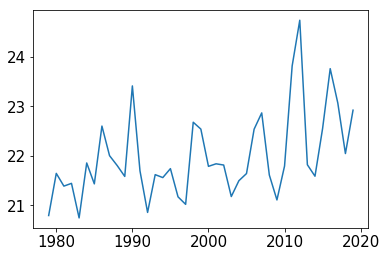

In [38]:
plt.plot(atlyrs,atltmax_mean_allyrs) #draw trend lines

## atlanta median tmax temps

(366,)


Text(0.5, 1.0, 'Atlanta Daily Median Maximum Temperature')

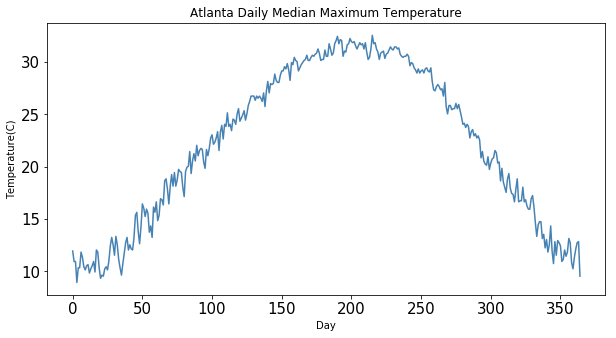

In [39]:
plt.figure(figsize=(10,5))

atltmax_median= np.median(atltmax,axis=0)

plt.plot(atltmax_median, color= 'steelblue', label= 'Maximum Temperature')
print((np.median(atltmax,axis=0)).shape)

plt.xlabel('Day')
plt.ylabel('Temperature(C)')
plt.title('Atlanta Daily Median Maximum Temperature')

## atlanta rhum temps

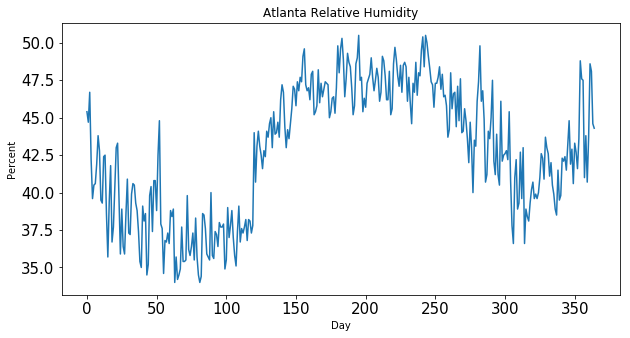

In [40]:
plt.figure(figsize=(10,5))

atlrhum_median = np.median(atlrhum,axis=0)

plt.plot(atlrhum_median, label= 'Relative Humidity')

plt.xlabel('Day')
plt.ylabel('Percent')
plt.title('Atlanta Relative Humidity')

plt.savefig('relhum_atl.JPEG',format='jpeg')

#more dangerous, susceptible to heat stress.

## Heat Index Calculations

In [41]:
# Input data
tdry = 35  # degrees Celsius
RH   = 20  # percent

# Calculate some parameters
Tr = (0.8841*tdry)+0.19
p  = (0.0196*tdry)+0.9031
es = 0.611*np.exp( 5423*( (1/273.15)  - (1/(tdry+273.15))   ) )

# Calculate heat index
Thi = Tr + (tdry-Tr)*(  (RH*es)/(100*1.6) )**p

# Print summary
print('Dry Bulb Temp: '+np.str(tdry)+' C')
print('Relative Humidity: '+np.str(RH)+' %')
print('THI feels like Temp: '+np.str(Thi)+' C')

Dry Bulb Temp: 35 C
Relative Humidity: 20 %
THI feels like Temp: 33.4694707635862 C


In [42]:
def heatindex(tmax,rmin):   #tmax and rhum
        # Calculate some parameters  
        Tr = (0.8841*tmax)+0.19
        p  = (0.0196*tmax)+0.9031   
        es = 0.611*np.exp( 5423*( (1/273.15)  - (1/(tmax+273.15))   ) )    
        #Calculate heat index    
        Thi = Tr + (tmax-Tr)*(  (rmin*es)/(100*1.6) )**p    
       
        return Thi
    #Calculate for one set of values
        THI_tmax = heatindex(30,30)
        print("Heat index is: ", THI_tmax)
        # Calculate for a while year
        THI_tmax = heatindex(year_tmax,year_rmin)
        print(THI_tmax)

## Atlanta THI

### Calculate heat indicies, median of heat indicies

In [43]:
THI_tmax_atl = heatindex(atltmax, atlrhum)
#print(THI_tmax_atl)
THI_tmax_atl_median = np.median(heatindex(atltmax,atlrhum), axis=0)

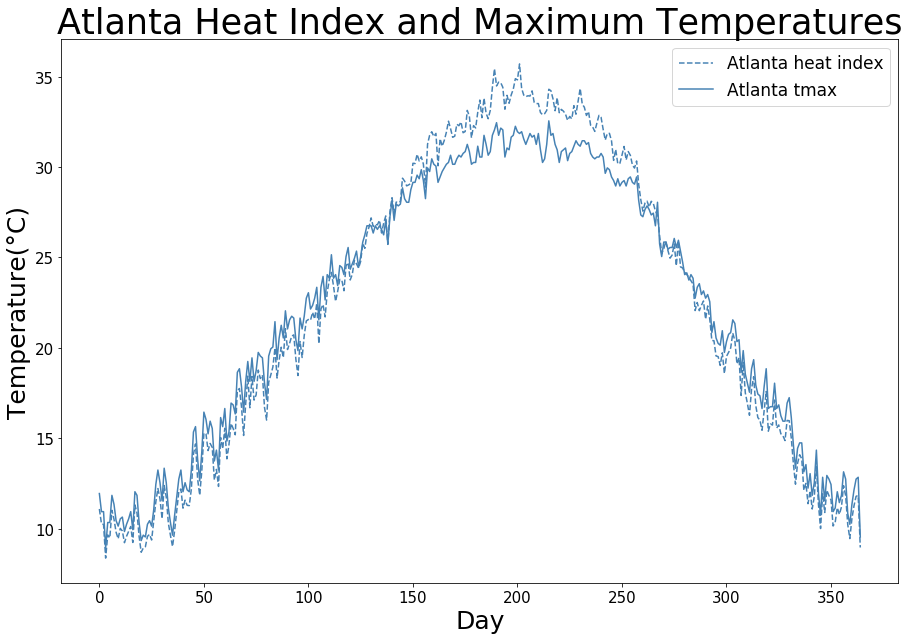

In [61]:
plt.figure(figsize=(15,10))

plt.plot(THI_tmax_atl_median,'--', color= 'steelblue', label= 'Atlanta heat index')
plt.plot(atltmax_median, color= 'steelblue', label= 'Atlanta tmax')

plt.rc('legend',fontsize=17) # using a size in points; SET DEFAULT USING RC
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 

plt.legend()
plt.xlabel('Day', size=25)
plt.ylabel('Temperature(°C)', size=25)
plt.title('Atlanta Heat Index and Maximum Temperatures', size=35)
plt.savefig('thi_tmax_atl.JPEG',format='jpeg')

## Number of days where temperature was above 33°C

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

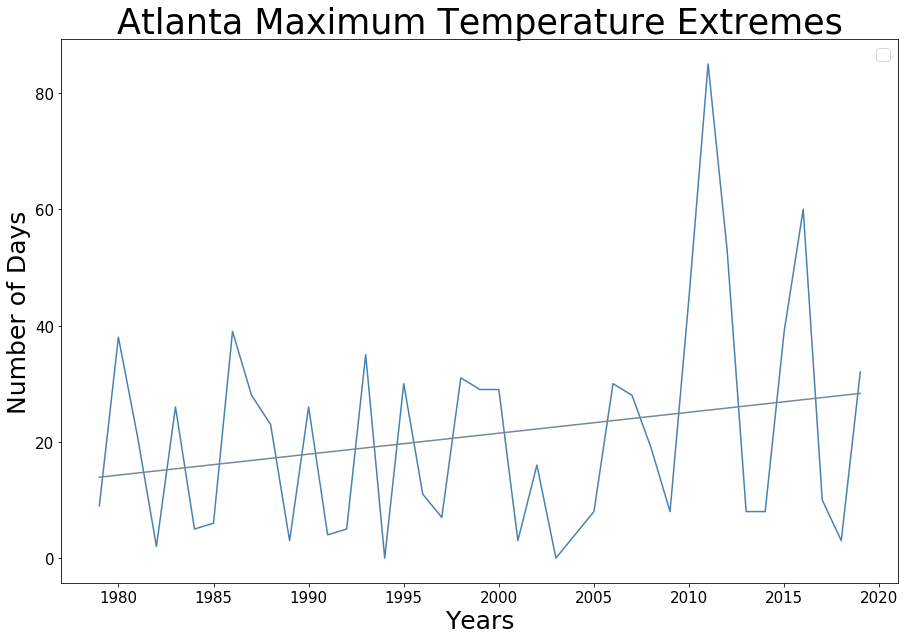

In [45]:
atl_heatdays = np.zeros((atlyrs.size))

#91/32.7, 103/39.4, 126/52.2


for i_atlyrs in enumerate(atlyrs):
     
    # Pull out current year temperatures
    curr_year = atltmax[i_atlyrs[0],:]
    
    atl_above_thresh = sum(i>=33 for i in curr_year)
    
    
    # Store value
    atl_heatdays[i_atlyrs[0]] = atl_above_thresh 

# Calculate the regression
regstat_ehd = stats.linregress(atlyrs,atl_heatdays)
reg_slope_ehd = regstat_ehd.slope      # slope of the regression line
reg_int_ehd   = regstat_ehd.intercept  # intercept of the regression line
reg_pval_ehd  = regstat_ehd.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_ehd = (atlyrs*reg_slope_ehd)+reg_int_ehd
    
plt.figure()
plt.figure(figsize=(15,10))
plt.legend()
plt.plot(atlyrs,atl_heatdays, color='steelblue', label = 'tmax')
plt.plot(atlyrs, y_pred_ehd, color = 'lightslategrey')
plt.title('Atlanta Maximum Temperature Extremes', size=35)
plt.xlabel('Years', size=25)
plt.ylabel('Number of Days', size=25)
plt.savefig('abovethresh_atl.JPEG',format='jpeg')
#trend line


No handles with labels found to put in legend.


Text(0, 0.5, 'Number of Days')

<Figure size 432x288 with 0 Axes>

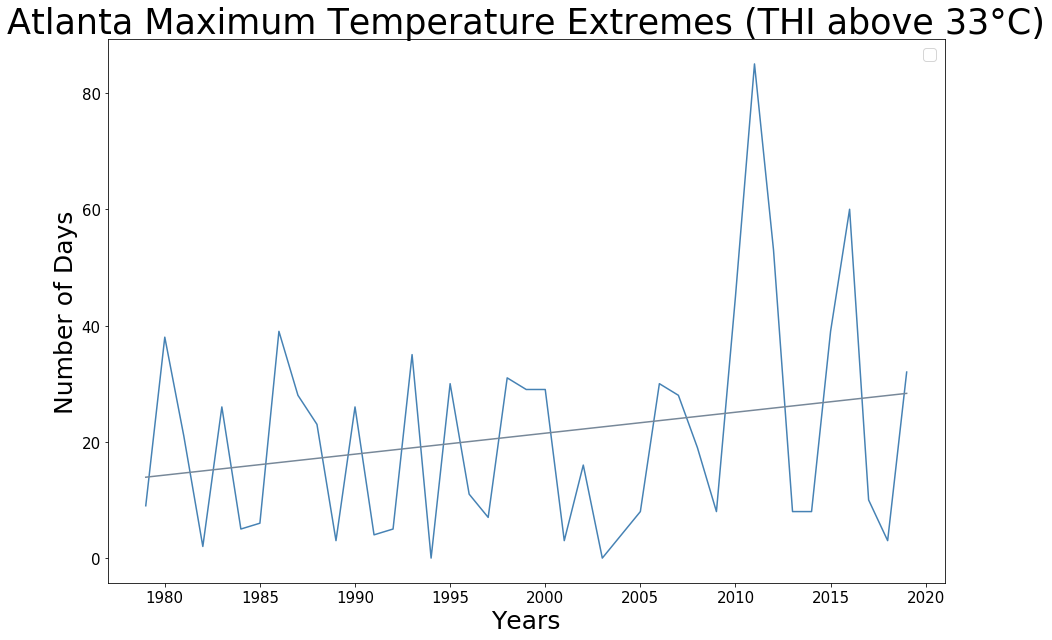

In [46]:
atl_heatdaysTHI = np.zeros((atlyrs.size))

#91/32.7, 103/39.4, 126/52.2


for i_atlyrs in enumerate(atlyrs):
     
    # Pull out current year temperatures
    curr_year = atltmax[i_atlyrs[0],:]
    
    atl_above_thresh = sum(i>=33 for i in curr_year)
    
    
    # Store value
    atl_heatdays[i_atlyrs[0]] = atl_above_thresh 

# Calculate the regression
regstat_ehd = stats.linregress(atlyrs,atl_heatdays)
reg_slope_ehd = regstat_ehd.slope      # slope of the regression line
reg_int_ehd   = regstat_ehd.intercept  # intercept of the regression line
reg_pval_ehd  = regstat_ehd.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_ehd = (atlyrs*reg_slope_ehd)+reg_int_ehd
    
plt.figure()
plt.figure(figsize=(15,10))
plt.legend()
plt.plot(atlyrs,atl_heatdays, color='steelblue', label = 'tmax')
plt.plot(atlyrs, y_pred_ehd, color = 'lightslategrey')
plt.title('Atlanta Maximum Temperature Extremes (THI above 33°C)', size=35)
plt.xlabel('Years', size=25)
plt.ylabel('Number of Days', size=25)



## Timing of first, last day above thresh and length of heat exposure season

### Make new array to make where there are nan =0

In [47]:
#day1_t33_atl.isnull()
#atlnanloc = np.where(day1_t33_atl is nan)

print(np.argwhere(np.isnan(day1_t33_atl)))

day1_t33_atl[15]


#make the places where nan exists 0
#using a copy of yr (to do linreg w equally sized arrays)

day1_t33_atl_nan = day1_t33_atl.copy()

day1_t33_atl_nan[15]=0
day1_t33_atl_nan[24]=0


#print(np.argwhere(np.isnan(day1_t33_atl_nan)))

#day1_t33_atl_nan[day1_t33_atl_nan!=float] = 0
#day1_t33_atl_nan.replace(np.nan,0)

print(day1_t33_atl_nan)


#del the days and make the size -2 and yrs vector -2

[[15]
 [24]]
[197. 184. 160. 186. 192. 170. 153. 171. 175. 168. 216. 171. 193. 190.
 162.   0. 159. 145. 183. 153. 187. 176. 189. 154.   0. 196. 165. 162.
 158. 157. 169. 163. 149. 146. 162. 170. 165. 152. 195. 192. 144.]


In [48]:
print(np.argwhere(np.isnan(day2_t33_atl)))


day2_t33_atl_nan = day2_t33_atl.copy()
day2_t33_atl_nan[15]=0
day2_t33_atl_nan[24]=0

print(day2_t33_atl_nan)

[[15]
 [24]]
[233. 260. 209. 202. 242. 193. 202. 220. 240. 240. 218. 251. 256. 194.
 244.   0. 242. 202. 231. 242. 251. 237. 192. 248.   0. 217. 234. 232.
 236. 219. 207. 264. 246. 251. 248. 241. 247. 269. 234. 257. 277.]


In [55]:
#keep

print(np.argwhere(np.isnan(length_t33)))

length_t33_nan = length_t33.copy()
length_t33_nan[15]=0
length_t33_nan[24]=0

print(length_t33_nan)

[[15]
 [24]]
[ 36.  76.  49.  16.  50.  23.  49.  49.  65.  72.   2.  80.  63.   4.
  82.   0.  83.  57.  48.  89.  64.  61.   3.  94.   0.  21.  69.  70.
  78.  62.  38. 101.  97. 105.  86.  71.  82. 117.  39.  65. 133.]


## Calculate for tmax temperatures

/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater_equal
  # Remove the CWD from sys.path while we load stuff.


(Second day Orl) pval: 0.2978012992475563 y-intercept:  -1314.9242160278745 slope: 0.7691637630662022
(First day Orl) pval: 0.42810511027086806 y-intercept:  1034.2435540069685 slope: -0.4358885017421602
(Length Orl) pval: 0.004070956775096876 y-intercept:  -2349.167770034843 slope: 1.2050522648083624


<Figure size 432x288 with 0 Axes>

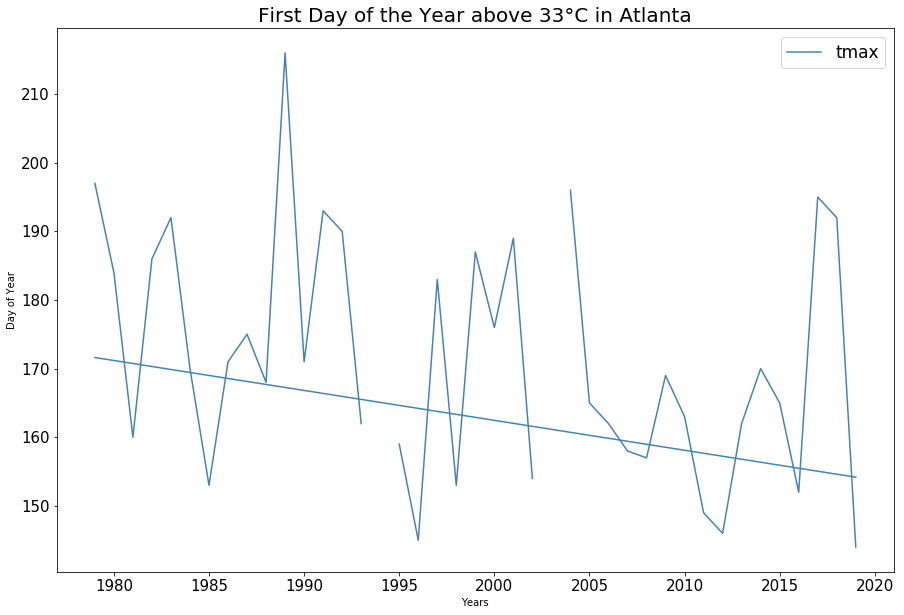

<Figure size 432x288 with 0 Axes>

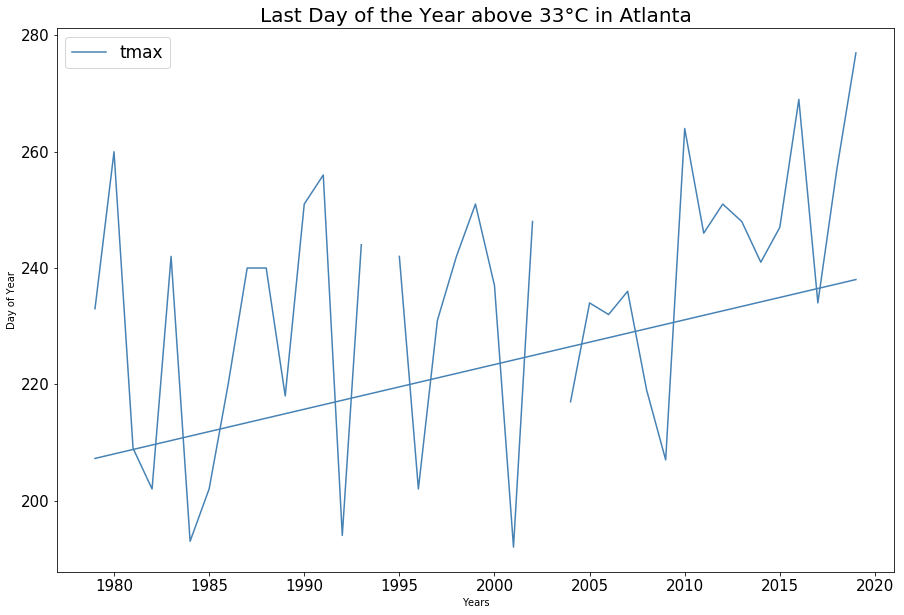

<Figure size 432x288 with 0 Axes>

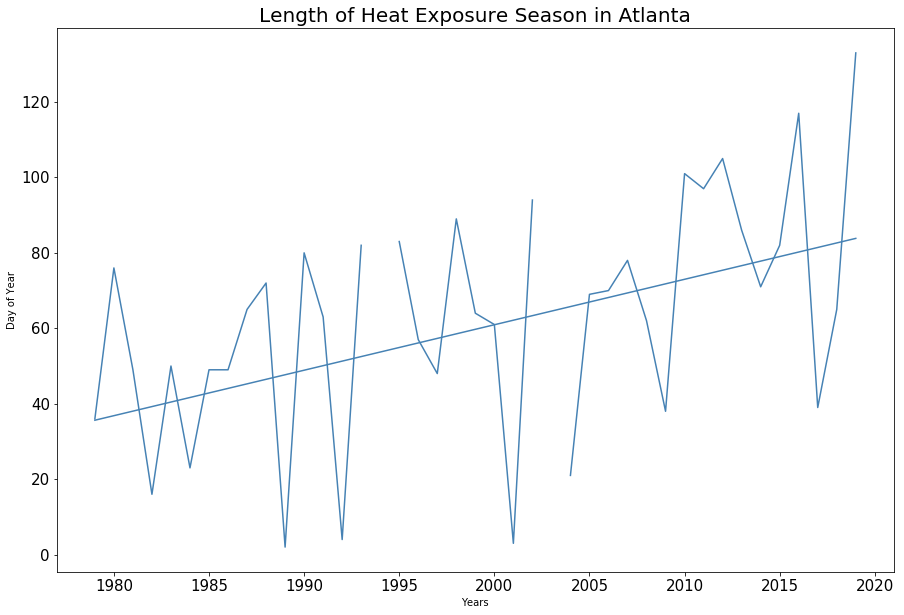

In [56]:
# Setup an array to store all the calculations
day1_t33_atl = np.zeros((atlyrs.size))   # The first day of the year with Tmax>33
day2_t33_atl = np.zeros((atlyrs.size))   # The last day of the year with Tmax>33
# Setup the Yearly Loop
for i_yr in enumerate(atlyrs):
    #print(i_yr)
    #Take out the temperatures for current year
    curr_yr_atl = atltmax[i_yr[0],:].copy()
    # Find location of ALL days with TMAX>=33
    loc_days_atl = np.where(curr_yr_atl>=33)
    # Setup a boolean in case there are no days above 33 C
    if np.size(loc_days_atl)==0:
        t33_d1 = np.nan
        t33_d2 = np.nan
    else:
        t33_d1 = np.min(loc_days_atl)+1        
        t33_d2 = np.max(loc_days_atl)+1        
    # Put it in the storage array
    day1_t33_atl[i_yr[0]] = t33_d1
    day2_t33_atl[i_yr[0]] = t33_d2

regstat_day2_t33= stats.linregress(atlyrs,day2_t33_atl_nan)
reg_slope_d2 = regstat_day2_t33.slope      # slope of the regression line
reg_int_d2   = regstat_day2_t33.intercept  # intercept of the regression line
reg_pval_d2  = regstat_day2_t33.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_day2 = (atlyrs*reg_slope_d2)+reg_int_d2

# Calculate the regression
regstat_day1_t33= stats.linregress(atlyrs,day1_t33_atl_nan)
reg_slope_d1 = regstat_day1_t33.slope      # slope of the regression line
reg_int_d1   = regstat_day1_t33.intercept  # intercept of the regression line
reg_pval_d1  = regstat_day1_t33.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_day1 = (atlyrs*reg_slope_d1)+reg_int_d1

#heat exposure period is difference
length_t33 = day2_t33_atl-day1_t33_atl

# Calculate the regression
regstat_len_t33= stats.linregress(atlyrs,length_t33_nan)
reg_slope = regstat_len_t33.slope      # slope of the regression line
reg_int   = regstat_len_t33.intercept  # intercept of the regression line
reg_pval  = regstat_len_t33.pvalue     # pvalue for significance
# Generate our model prediction
y_pred = (atlyrs*reg_slope)+reg_int
#plt.figure()
#plt.plot(atlyrs,length_t33)
#plt.plot(atlyrs,y_pred,color='steelblue')

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(atlyrs,day1_t33_atl, color='steelblue', label ='tmax')
plt.plot(atlyrs, y_pred_day1, color = 'steelblue')
plt.title('First Day of the Year above 33°C in Atlanta', size=20)
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.legend()
plt.savefig('timing_first_atl.JPEG',format='jpeg')

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(atlyrs,day2_t33_atl, color='steelblue', label ='tmax')
plt.plot(atlyrs, y_pred_day2, color = 'steelblue')
plt.title('Last Day of the Year above 33°C in Atlanta', size=20)
plt.xlabel('Years')
plt.ylabel('Day of Year')
plt.legend()
plt.savefig('timing_last_atl.JPEG',format='jpeg')

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(atlyrs,length_t33, color='steelblue', label ='tmax')
plt.plot(atlyrs,y_pred,color='steelblue')
plt.title('Length of Heat Exposure Season in Atlanta', size=20)
plt.xlabel('Years')
plt.ylabel('Day of Year')

plt.savefig('timing_heatseason_atl.JPEG',format='jpeg')

#print('pval: ',reg_pval, 'slope: ',reg_slope)
print('(Second day Orl) pval:', reg_pval_d2,'y-intercept: ',reg_int_d2, 'slope:', reg_slope_d2)
print('(First day Orl) pval:', reg_pval_d1,'y-intercept: ',reg_int_d1, 'slope:', reg_slope_d1)
print('(Length Orl) pval:', reg_pval,'y-intercept: ',reg_int, 'slope:', reg_slope)




## Calculate for heat indicies

pval:  0.134399106003075 slope:  0.3473867595818816


<Figure size 432x288 with 0 Axes>

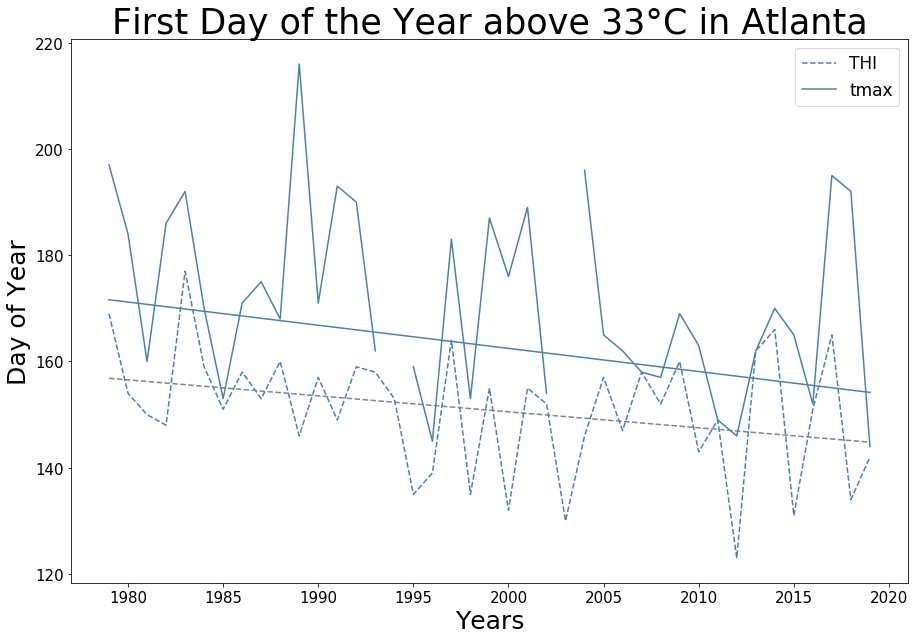

<Figure size 432x288 with 0 Axes>

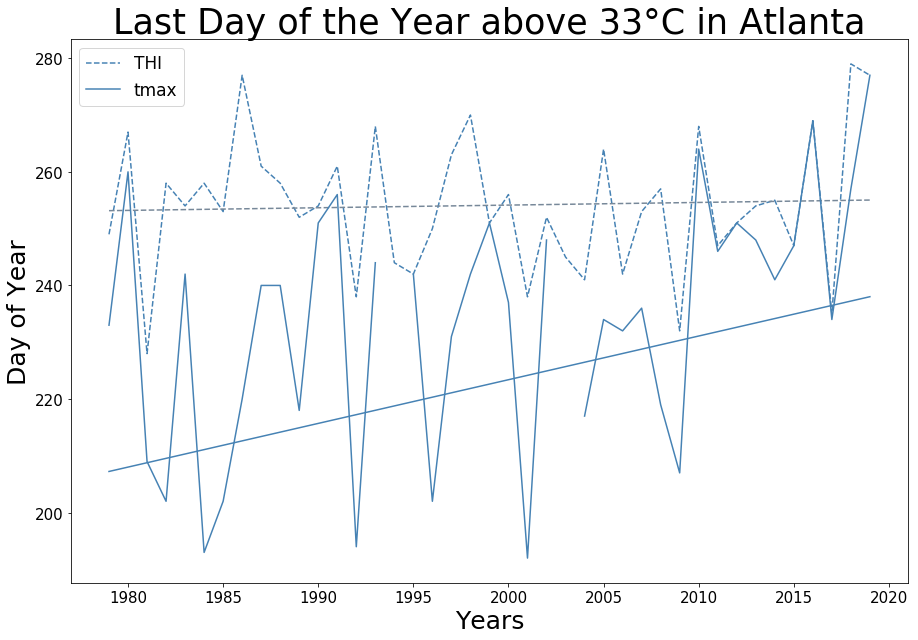

<Figure size 432x288 with 0 Axes>

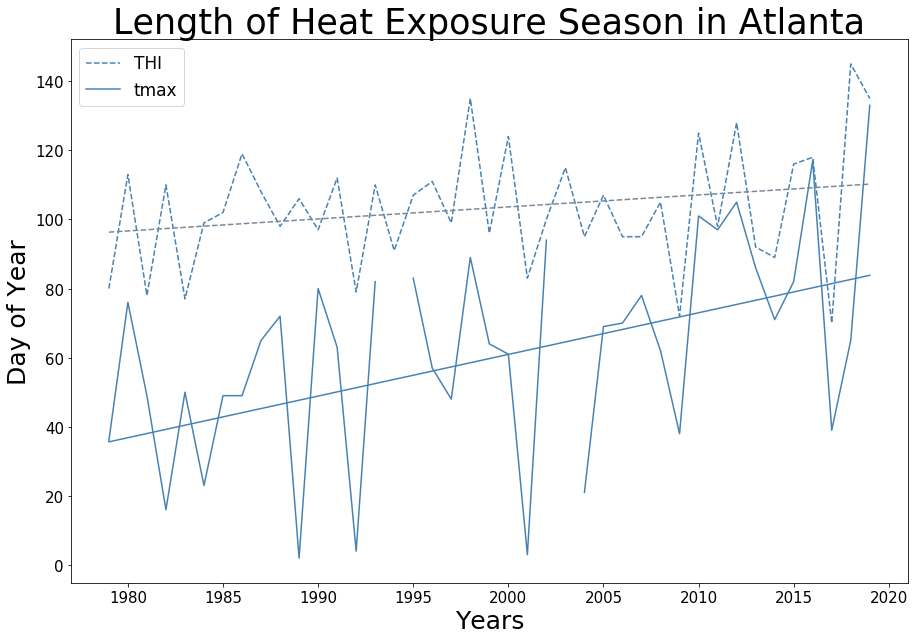

In [57]:
# Setup an array to store all the calculations
day1_t33_atlTHI = np.zeros((atlyrs.size))   # The first day of the year with Tmax>33
day2_t33_atlTHI = np.zeros((atlyrs.size))   # The last day of the year with Tmax>33
# Setup the Yearly Loop


for i_yr in enumerate(atlyrs):
    #print(i_yr)
    #Take out the temperatures for current year
    curr_yr_atl = THI_tmax_atl[i_yr[0],:]
    # Find location of ALL days with TMAX>=33
    loc_days_atl = np.where(curr_yr_atl>=33)
    # Setup a boolean in case there are no days above 33 C
    if np.size(loc_days_atl)==0:
        t33_d1_atl = np.nan
        t33_d2_atl = np.nan
    else:
        t33_d1_atl = np.min(loc_days_atl)+1        
        t33_d2_atl = np.max(loc_days_atl)+1        
    # Put it in the storage array
    day1_t33_atlTHI[i_yr[0]] = t33_d1_atl
    day2_t33_atlTHI[i_yr[0]] = t33_d2_atl

heatexp_atl=day2_t33_atlTHI-day1_t33_atlTHI #heat exposure period

length_t33THI = day2_t33_atlTHI-day1_t33_atlTHI

regstat_day2_t33THI= stats.linregress(atlyrs,day2_t33_atlTHI)
reg_slope_d2THI = regstat_day2_t33THI.slope      # slope of the regression line
reg_int_d2THI   = regstat_day2_t33THI.intercept  # intercept of the regression line
reg_pval_d2THI  = regstat_day2_t33THI.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_day2THI = (atlyrs*reg_slope_d2THI)+reg_int_d2THI

# Calculate the regression
regstat_day1_t33THI= stats.linregress(atlyrs,day1_t33_atlTHI)
reg_slope_d1THI = regstat_day1_t33THI.slope      # slope of the regression line
reg_int_d1THI  = regstat_day1_t33THI.intercept  # intercept of the regression line
reg_pval_d1THI  = regstat_day1_t33THI.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_day1THI = (atlyrs*reg_slope_d1THI)+reg_int_d1THI

# Calculate the regression
regstat_len_t33THI = stats.linregress(atlyrs,length_t33THI)
reg_slopeTHI = regstat_len_t33THI.slope      # slope of the regression line
reg_intTHI   = regstat_len_t33THI.intercept  # intercept of the regression line
reg_pvalTHI  = regstat_len_t33THI.pvalue     # pvalue for significance
# Generate our model prediction
y_predTHI = (atlyrs*reg_slopeTHI)+reg_intTHI



plt.figure()
plt.figure(figsize=(15,10))
plt.plot(atlyrs,day1_t33_atlTHI,'--', color='steelblue', label='THI')
plt.plot(atlyrs, y_pred_day1THI,'--', color='lightslategrey')

plt.plot(atlyrs,day1_t33_atl, color='steelblue', label ='tmax')
plt.plot(atlyrs, y_pred_day1, color = 'steelblue')
plt.title('First Day of the Year above 33°C in Atlanta', size=35)
plt.xlabel('Years', size=25)
plt.ylabel('Day of Year', size=25)
plt.legend()
plt.savefig('timing_firstTHI_atl.JPEG',format='jpeg')

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(atlyrs,day2_t33_atlTHI,'--', color='steelblue', label='THI')
plt.plot(atlyrs, y_pred_day2THI,'--', color='lightslategrey')
plt.plot(atlyrs,day2_t33_atl, color='steelblue', label ='tmax')
plt.plot(atlyrs, y_pred_day2, color = 'steelblue')

plt.title('Last Day of the Year above 33°C in Atlanta', size=35)
plt.xlabel('Years', size=25)
plt.ylabel('Day of Year', size=25)
plt.legend()
plt.savefig('timing_lastTHI_atl.JPEG',format='jpeg')

plt.figure()
plt.figure(figsize=(15,10))
plt.plot(atlyrs,heatexp_atl,'--', color='steelblue', label='THI')
plt.plot(atlyrs, y_predTHI,'--', color='lightslategrey')

plt.plot(atlyrs,length_t33, color='steelblue', label ='tmax')
plt.plot(atlyrs,y_pred,color='steelblue')
plt.title('Length of Heat Exposure Season in Atlanta', size=35) #Heat index as title
plt.xlabel('Years', size=25)
plt.ylabel('Day of Year', size=25)
plt.legend()
plt.savefig('timing_heatseasonTHI_atl.JPEG',format='jpeg')

print('pval: ',reg_pvalTHI, 'slope: ',reg_slopeTHI)

# Print all calculations!!!!

In [58]:

#d1 / 1st day
print('d1 THI 2050: ', 2050*reg_slope_d1+reg_int_d1)
print('d1 tmax 2050: ',2050*reg_slope_d1THI+reg_int_d1THI)

#d2 / last day
print('d2 THI 2050: ', 2050*reg_slope_d2+reg_int_d2)
print('d2 tmax 2050: ',2050*reg_slope_d2THI+reg_int_d2THI)

#heat exp season
print('len THI 2050: ', 2050*reg_slope+reg_int)
print('len tmax 2050: ',2050*reg_slopeTHI+reg_intTHI)

print('')
print('all stats len tmax', regstat_len_t33) #len tmax
print('all stats len THI', regstat_len_t33THI)
print('')
print('all stats d2 tmax', regstat_day1_t33) #d1 tmax
print('all stats d2 THI', regstat_day1_t33THI) #d1 THI
print()
print('all stats d1 tmax', regstat_day1_t33)#len tmax
print('all stats d1 THI', regstat_day1_t33THI)#len THI
print()
print('EXP 2019: THI: ', heatexp_atl[-1],'2019 tmax: ', length_t33[-1]) #variables switched here..
print()
print('   d1 2019: tmax: ', day1_t33_atl[-1],'2019 THI: ', day1_t33_atlTHI[-1])
print()
print('   d2 2019: tmax: ', day2_t33_atl[-1],'2019 THI: ', day2_t33_atlTHI[-1])
print()


#d1 / 1st day
print('d1 TMAX 2050: ', 2050*reg_slope_d1+reg_int_d1)
print('d1 THI 2050: ',2050*reg_slope_d1THI+reg_int_d1THI)
print()
#d2 / last day
print('d2 TMAX 2050: ', 2050*reg_slope_d2+reg_int_d2)
print('d2 THI 2050: ',2050*reg_slope_d2THI+reg_int_d2THI)
print()
#heat exp season
print('len TMAX 2050: ', 2050*reg_slope+reg_int)
print('len THI 2050: ',2050*reg_slopeTHI+reg_intTHI)

d1 THI 2050:  140.67212543554
d1 tmax 2050:  135.49372822299654
d2 THI 2050:  261.8614982578399
d2 tmax 2050:  256.47874564459926
len THI 2050:  121.18937282229945
len tmax 2050:  120.98501742160272

all stats len tmax LinregressResult(slope=1.2050522648083624, intercept=-2349.167770034843, rvalue=0.43916654798904314, pvalue=0.004070956775096876, stderr=0.3947451573274673)
all stats len THI LinregressResult(slope=0.3473867595818816, intercept=-591.1578397212545, rvalue=0.2377742657022369, pvalue=0.134399106003075, stderr=0.22723678552474766)

all stats d2 tmax LinregressResult(slope=-0.4358885017421602, intercept=1034.2435540069685, rvalue=-0.12718757404287093, pvalue=0.42810511027086806, stderr=0.5443233718973369)
all stats d2 THI LinregressResult(slope=-0.3006968641114983, intercept=751.9222996515681, rvalue=-0.30916671645627863, pvalue=0.04919508030032924, stderr=0.14811122240597574)

all stats d1 tmax LinregressResult(slope=-0.4358885017421602, intercept=1034.2435540069685, rvalue=

## Cooling degree days

(41,)
86547.1400000002
pval:  0.0015537580107622205 slope:  9.289724738675911 int -16459.25389895461


/Users/fiker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less_equal
  import sys


<Figure size 432x288 with 0 Axes>

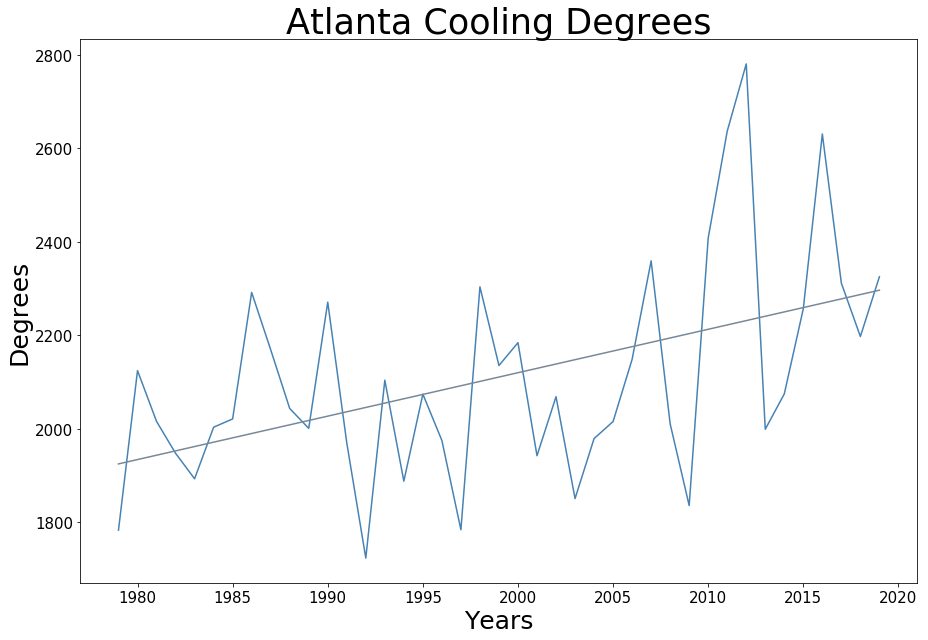

In [59]:
# Calculate the cooling degree days.
# Set the threshold for a CDD
thresh_cdd=18.33

# Convert individual days into CDD
year_cdd_atl = atltmax-thresh_cdd
i_noncdd_atl = np.where(year_cdd_atl<=0)
year_cdd_atl[i_noncdd_atl]=0

sumcdd_atl = np.nansum(year_cdd_atl, axis=1)

# Calculate the regression
regstat_CDD= stats.linregress(atlyrs,sumcdd_atl)
reg_slopeCDD = regstat_CDD.slope      # slope of the regression line
reg_intCDD   = regstat_CDD.intercept  # intercept of the regression line
reg_pvalCDD  = regstat_CDD.pvalue     # pvalue for significance
# Generate our model prediction
y_pred_cdd = (atlyrs*reg_slopeCDD)+reg_intCDD

plt.figure()
plt.figure(figsize=(15,10))
plt.title('Atlanta Cooling Degrees', size=35)
plt.xlabel('Years', size=25)
plt.ylabel('Degrees', size=25)
plt.plot(atlyrs,sumcdd_atl, color='steelblue')
plt.plot(atlyrs, y_pred_cdd, color='lightslategrey')
plt.savefig('CDD_atl.JPEG',format='jpeg')

print(sumcdd_atl.shape)
# Find the location of all the cooling degree days
# Use the locations
year_cumcdd = np.sum(year_cdd_atl[i_noncdd_atl])
print(np.sum(sumcdd_atl))

print('pval: ',reg_pvalCDD, 'slope: ',reg_slopeCDD, 'int', reg_intCDD)

In [60]:
#trend lines, do calc for ehd for heat index, replicate for other cities
#NUMBER of days above 33 tmax, thi, per yr